In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [2]:
base_dir = 'C:/Users/Owner/OneDrive//Desktop/homework/HW1/Data Set/flowers/'
cat_lst = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
X = []
y = []

# Hyper parameter
imgsize = 150
batch_size = 128
epochs = 50

In [3]:
# The function of loading data from the corresponding path
def load_data(data_dir, cat):
    data_dir = data_dir + cat + '/'
    print ("Loading：", data_dir) 
    print()
    for img in os.listdir(data_dir): 
        path = data_dir + img
        img = cv2.imread(path) 
        if img is None:
            print('Wrong path')
            exit(0)

        # Resize all data
        img = cv2.resize(img, (imgsize, imgsize)) 
        X.append(np.array(img)) 
        y.append(cat) 

In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load all data and the labels into the array X and y, respectively 
for i in range(len(cat_lst)):
    load_data(base_dir, cat_lst[i])

# Normalize the X 
X = np.array(X)
X = X / 255

# Transform the y from the format of string to the format of array with binary elements 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 
y = to_categorical(y, 5)

Loading： C:/Users/Owner/OneDrive//Desktop/homework/HW1/Data Set/flowers/daisy/

Loading： C:/Users/Owner/OneDrive//Desktop/homework/HW1/Data Set/flowers/dandelion/

Loading： C:/Users/Owner/OneDrive//Desktop/homework/HW1/Data Set/flowers/rose/

Loading： C:/Users/Owner/OneDrive//Desktop/homework/HW1/Data Set/flowers/sunflower/

Loading： C:/Users/Owner/OneDrive//Desktop/homework/HW1/Data Set/flowers/tulip/



In [5]:
from sklearn.model_selection import train_test_split

# Divide the data into 'training set' and 'testing set'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# Build the model by CNN
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (imgsize, imgsize, 3)))                    
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

cnn_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu')) 
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2))) 

cnn_model.add(layers.Conv2D(filters = 96, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2))) 

cnn_model.add(layers.Conv2D(filters = 96, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2))) 

cnn_model.add(layers.Flatten()) 
cnn_model.add(layers.Dense(512, activation = 'relu')) 
cnn_model.add(layers.Dropout(0.5)) 
cnn_model.add(layers.Dense(5, activation='softmax')) 
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['acc']) 

In [7]:
# Train the model by the training set
history = cnn_model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = 0.2)

Epoch 1/50
22/22 [==============================] - 68s 3s/step - loss: 1.5068 - acc: 0.3042 - val_loss: 1.2373 - val_acc: 0.5036
Epoch 2/50
22/22 [==============================] - 55s 3s/step - loss: 1.1798 - acc: 0.5114 - val_loss: 1.0612 - val_acc: 0.5586
Epoch 3/50
22/22 [==============================] - 55s 2s/step - loss: 1.0453 - acc: 0.5893 - val_loss: 0.9981 - val_acc: 0.5919
Epoch 4/50
22/22 [==============================] - 55s 3s/step - loss: 0.9643 - acc: 0.6016 - val_loss: 0.9756 - val_acc: 0.6136
Epoch 5/50
22/22 [==============================] - 53s 2s/step - loss: 0.8978 - acc: 0.6498 - val_loss: 0.8304 - val_acc: 0.6686
Epoch 6/50
22/22 [==============================] - 56s 3s/step - loss: 0.8144 - acc: 0.6784 - val_loss: 0.8727 - val_acc: 0.6454
Epoch 7/50
22/22 [==============================] - 59s 3s/step - loss: 0.7564 - acc: 0.7110 - val_loss: 0.8035 - val_acc: 0.6903
Epoch 8/50
22/22 [==============================] - 69s 3s/step - loss: 0.7347 - acc: 0.71

In [8]:
# The function of showing the training history of 'loss' and 'accruacy'
def show_history(history): 

    # The image of training and validation loss
    loss = history.history['loss'] 
    val_loss = history.history['val_loss'] 
    epochs = range(1, len(loss) + 1) 
    plt.figure(figsize=(12,4)) 
    plt.subplot(1, 2, 1) 
    plt.plot(epochs, loss, 'r', label='Training loss') 
    plt.plot(epochs, val_loss, 'b', label='Validation loss') 
    plt.title('Training and validation loss') 
    plt.xlabel('Epochs') 
    plt.ylabel('Loss') 
    plt.legend() 

    # The image of training and validation accruacy
    acc = history.history['acc'] 
    val_acc = history.history['val_acc'] 
    plt.subplot(1, 2, 2) 
    plt.plot(epochs, acc, 'r', label='Training acc') 
    plt.plot(epochs, val_acc, 'b', label='Validation acc') 
    plt.title('Training and validation accuracy') 
    plt.xlabel('Epochs') 
    plt.ylabel('Accuracy') 
    plt.legend() 
    plt.show() 

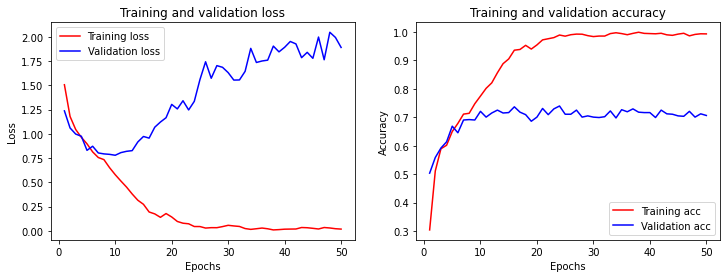

In [9]:
# Show the image of training history 
show_history(history) 

In [10]:
# Evulate the CNN model by four different metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_true = []
y_pred = []
y_test_pred = cnn_model.predict(X_test)

# Transform the real label and predicted label from the format of array to the format of index
for i in range(len(y_test)):
    y_true.append(y_test[i].tolist().index(1.0))
    y_pred.append(y_test_pred[i].tolist().index(max(y_test_pred[i])))

# The metric of accuracy
accuracy = accuracy_score(y_true, y_pred)

# The metric of precision
precision = precision_score(y_true, y_pred, average = 'macro')

# The metric of recall
recall = recall_score(y_true, y_pred, average = 'macro')

# The metric of F1
f1 = f1_score(y_true, y_pred, average = 'macro')

print('The \"Accruacy\" of CNN model is {0:.5f}'.format(accuracy))    
print('The \"Precision\" of CNN model is {0:.5f}'.format(precision))  
print('The \"Recall\" of CNN model is {0:.5f}'.format(recall)) 
print('The \"F1\" of CNN model is {0:.5f}'.format(f1)) 



27/27 [==============================] - 6s 217ms/step
The "Accruacy" of CNN model is 0.67245
The "Precision" of CNN model is 0.67381
The "Recall" of CNN model is 0.66966
The "F1" of CNN model is 0.66886


In [11]:
# Randomly select ten different indexes
idxs = np.random.randint(0, len(y_test), size = 10)
real = []
predict = []

for i in range(10): 
    real.append(y_test[idxs[i]].tolist()) 
    predict.append(y_test_pred[idxs[i]].tolist())

# Output real answers and predicted answers of ten different testing data
for i in range(10):
    if i == 0:
        print("-" * 63)               
        print("| {:<20}| {:<20}| {:<20}".format("Real Answer", "Predicted Answer", "Predicted Success"))
        print("-" * 63)
    r_ans = cat_lst[real[i].index(max(real[i]))]
    p_ans = cat_lst[predict[i].index(max(predict[i]))]
    if r_ans == p_ans: 
        ans = "true"
    else:
        ans = "false"
    print("| {:<20}| {:<20}| {:<20}".format(r_ans, p_ans, ans))

---------------------------------------------------------------
| Real Answer         | Predicted Answer    | Predicted Success   
---------------------------------------------------------------
| tulip               | tulip               | true                
| rose                | rose                | true                
| rose                | rose                | true                
| tulip               | rose                | false               
| rose                | daisy               | false               
| rose                | tulip               | false               
| tulip               | tulip               | true                
| daisy               | daisy               | true                
| dandelion           | tulip               | false               
| dandelion           | dandelion           | true                
